In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("https://sololearn.com/uploads/files/titanic.csv")
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
df.isnull().head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


<AxesSubplot:>

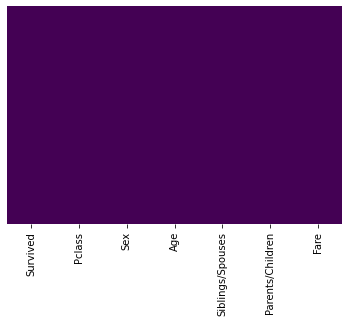

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# no data is NULL.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

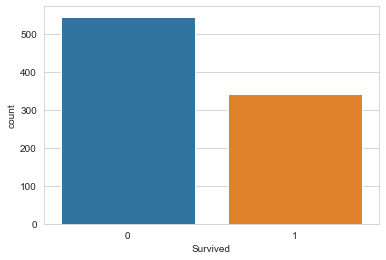

In [6]:
sns.set_style('whitegrid')
sns.countplot('Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

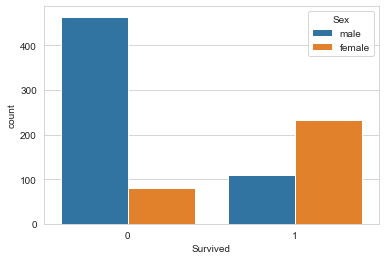

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

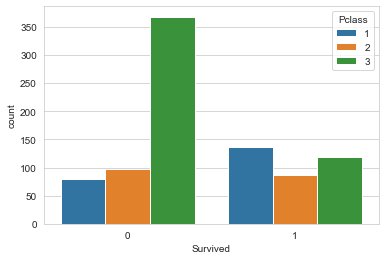

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=df)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

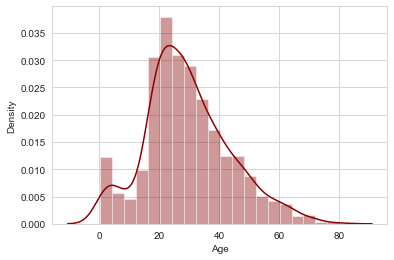

In [9]:
sns.distplot(df['Age'],color='darkred',bins=20)
# df['Age'].hist()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

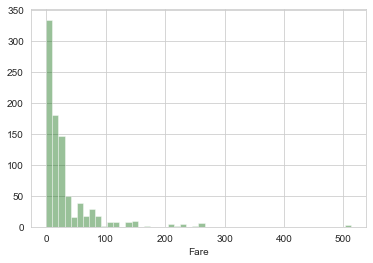

In [10]:
sns.distplot(df['Fare'],color='darkgreen',kde=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

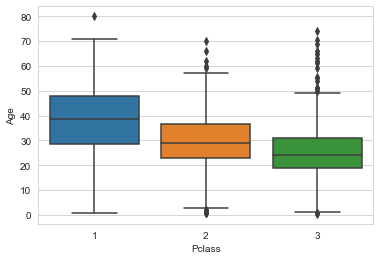

In [11]:
## if there was null data in set.
sns.boxplot(y='Age',x='Pclass',data=df)
#from here we are getting that for passenger in 1st class the average age is 37 something, similarly for 2nd class ave age is 
#28 and for 3rd class its 25.

# creating function for cleansing data.

In [12]:

# def impute_age(cols):
#     Age=cols[0]
#     Pclass=cols[1]
    
#     if pd.isnull(Age):
        
#         if Pclass ==1:
#             return 37
        
#         elif (Pclass==2):
#             return 28
#         else:
#             return 25
#     else:
#         return Age
            

# applying function.

In [13]:
#  df['Age']=df[['Age','Pclass']].apply(impute_age)

In [41]:
df.head()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare,sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [5]:
df['sex']=df['Sex']=='male'
df['sex']=df['sex'].astype(int)
df.pop('Sex')
df.head()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare,sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# predicting 

In [6]:
from sklearn.linear_model import LogisticRegression
X = df[['Pclass', 'sex', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y=df['Survived'].values
model=LogisticRegression()
model.fit(X,y)
y_pred=model.predict(X)

In [16]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

print("Accuracy:",accuracy_score(y,y_pred)*100)
print("precision:",precision_score(y,y_pred)*100)
print("recall:",recall_score(y,y_pred)*100)
print("F1 score:",f1_score(y,y_pred)*100)

Accuracy: 80.49605411499437
precision: 77.34627831715211
recall: 69.88304093567251
F1 score: 73.42549923195082


In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))
#reverses the confusion matrix

[[475  70]
 [103 239]]


# train test split

In [18]:
# def split_test_train(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_data=shuffled[:test_set_size]
#     train_data=shuffled[test_set_size:]
#     return data.iloc[train_data],data.iloc[test_data]

In [1]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=41)
model.fit(X_train,y_train)
# print(model.predict_proba(X_test))
# y_pred=model.predict(X_test)
y_pred=model.predict_proba(X_test)[:,1]>0.75
score=model.score(X_test,y_test)
print(score*100)
print("Accuracy:",accuracy_score(y_test,y_pred)*100)
print("precision:",precision_score(y_test,y_pred)*100)
print("recall:",recall_score(y_test,y_pred)*100)
print("F1 score:",f1_score(y_test,y_pred)*100)

NameError: name 'X' is not defined

Text(0, 0.5, 'sensitivity')

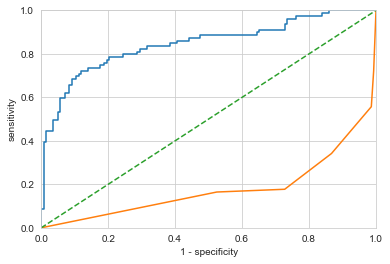

In [20]:
from sklearn.metrics import roc_curve

#taking all features
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred_prob1 = model1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob1[:,1])
plt.plot(fpr, tpr)

#only taking Pclass and age as features.
model2=LogisticRegression()
model2.fit(X_train[:,0:2],y_train)
y_pred_prob2=model2.predict_proba(X_test[:,0:2])
fpr2 , tpr2,thresholds=roc_curve(y_test,y_pred_prob2[:,0:1])
plt.plot(fpr2, tpr2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')

In [21]:
from sklearn.metrics import roc_auc_score

mode1_score=roc_auc_score(y_test,y_pred_prob1[:,1])

mode2_score=roc_auc_score(y_test,y_pred_prob2[:,1])
mode1_score,mode2_score

(0.8465079224572895, 0.8219881384438346)

In [8]:
from sklearn.model_selection import KFold
X1 = df[['Age', 'Fare']].values[:6]
y1= df['Survived'].values[:6]
kf=KFold(n_splits=3,shuffle=False)
for train,test in kf.split(X1):
    print(train,test)
lis=list(kf.split(X1))
lis

[2 3 4 5] [0 1]
[0 1 4 5] [2 3]
[0 1 2 3] [4 5]


[(array([2, 3, 4, 5]), array([0, 1])),
 (array([0, 1, 4, 5]), array([2, 3])),
 (array([0, 1, 2, 3]), array([4, 5]))]

In [23]:
first_split=lis[0]
train_indice1,test_indice1=first_split

In [24]:
# X2=np.array([[1,2,3,4],[5,6,7,8],[41,62,53,41,41,21],[312,532,412,431,21,555]])
# y2=np.array([0,1,2,3,5,6,7])
# kf1=KFold(n_splits=4)
# ls=list(kf1.split(X2))
# ls
# kf.get_n_splits(y2)

In [25]:
train_indice
test_indice

NameError: name 'train_indice' is not defined

In [ ]:
X_train=X1[train_indice]
y_train=y1[train_indice]
X_test=X1[test_indice]
y_test = y1[test_indice]

In [ ]:
# df.iloc[5]


# for all diffrent dataset we will find score.

In [ ]:
scores=[]
kf=KFold(n_splits=5,shuffle=True)
for train_indice,test_indice in kf.split(X):
    X_train,X_test=X[train_indice],X[test_indice]
    y_train,y_test=y[train_indice],y[test_indice]
    model=LogisticRegression()
    model.fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))
print(scores)
np.mean(scores)

Now that we’ve calculated the accuracy, we no longer need the 5 different models that we’ve built.
For future use,we just want a single model.
To get the single best possible model, we build a model on the whole dataset. 
If we’re asked the accuracy of this model, we use the accuracy calculated by cross validation (0.79029) even though we haven’t 
actually tested this particular model with a test set.